In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('goldstock.csv')

In [ ]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

# Extract day, month, and year
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

print(df)

           Date   Close    Volume    Open    High     Low  Day  Month  Year
0    2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2   19      1  2024
1    2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7   18      1  2024
2    2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6   17      1  2024
3    2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6   16      1  2024
4    2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1   12      1  2024
...         ...     ...       ...     ...     ...     ...  ...    ...   ...
2506 2014-01-28  1250.5   81426.0  1254.9  1261.9  1248.0   28      1  2014
2507 2014-01-27  1263.5   63419.0  1269.9  1280.1  1252.0   27      1  2014
2508 2014-01-24  1264.5   34998.0  1264.3  1273.2  1256.9   24      1  2014
2509 2014-01-23  1262.5   41697.0  1235.1  1267.1  1230.8   23      1  2014
2510 2014-01-22  1238.6   80262.0  1240.5  1243.5  1235.5   22      1  2014

[2511 rows x 9 columns]


In [ ]:
print(df['Month'].unique())

[ 1 12 11 10  9  8  7  6  5  4  3  2]


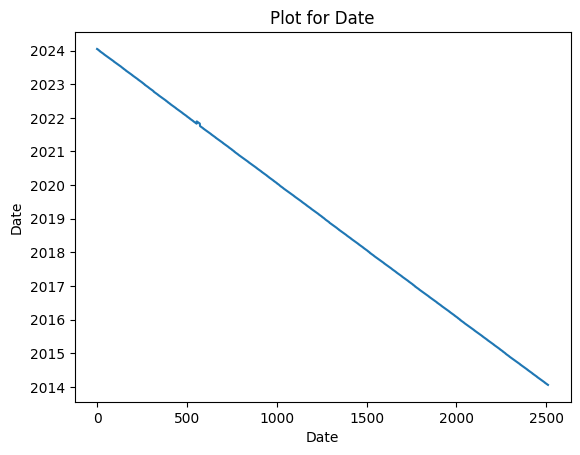

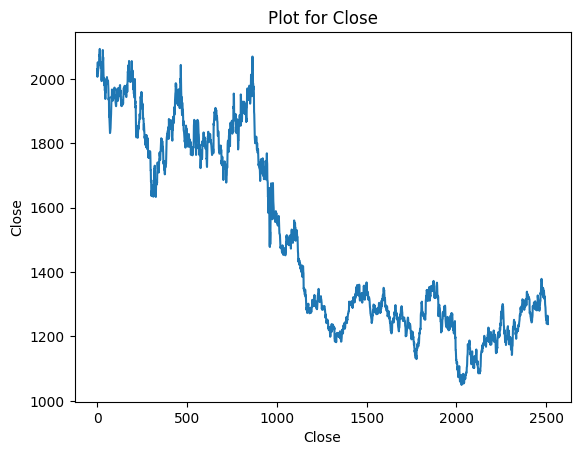

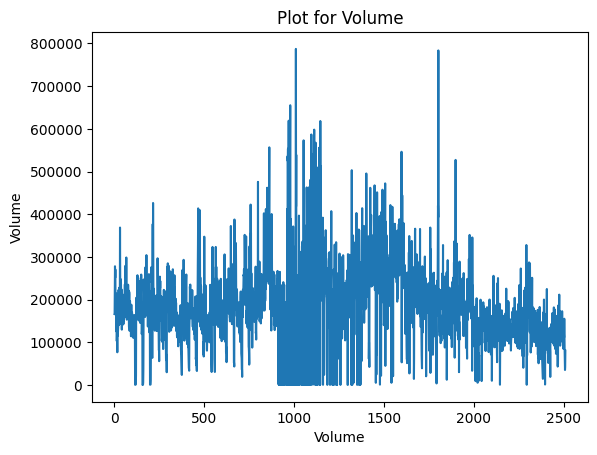

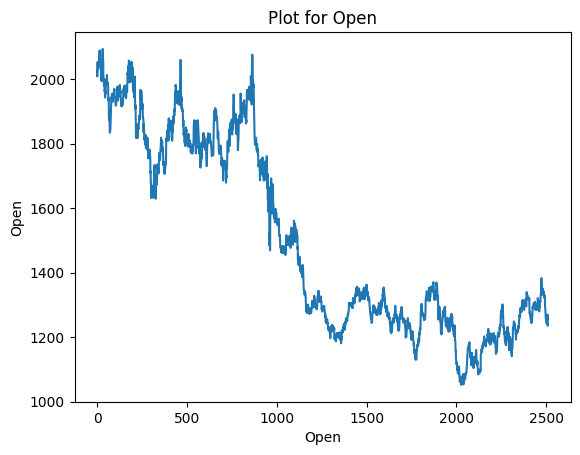

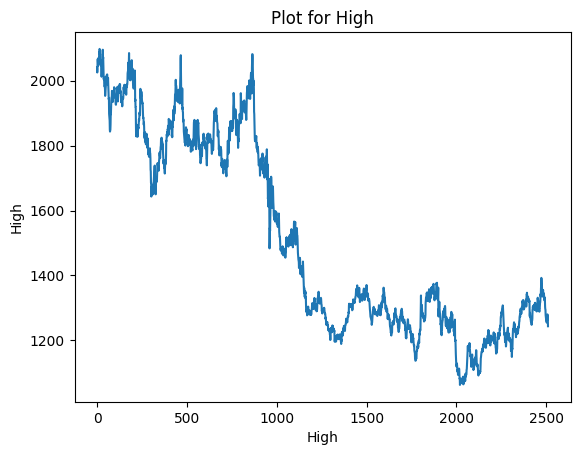

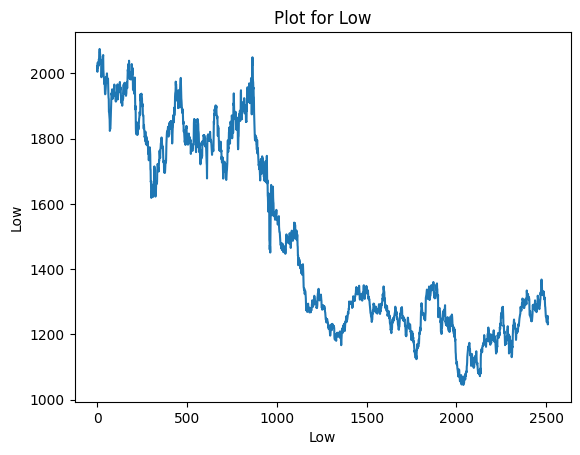

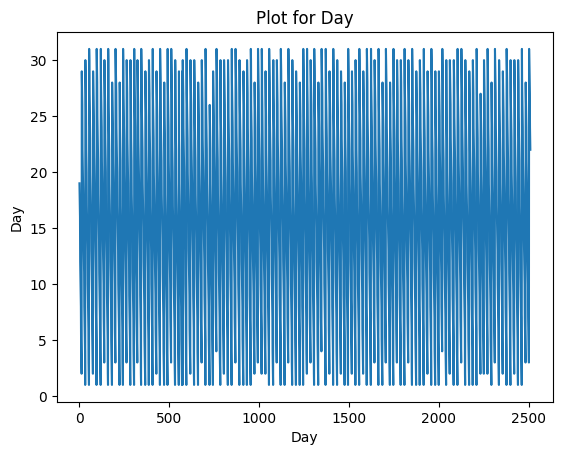

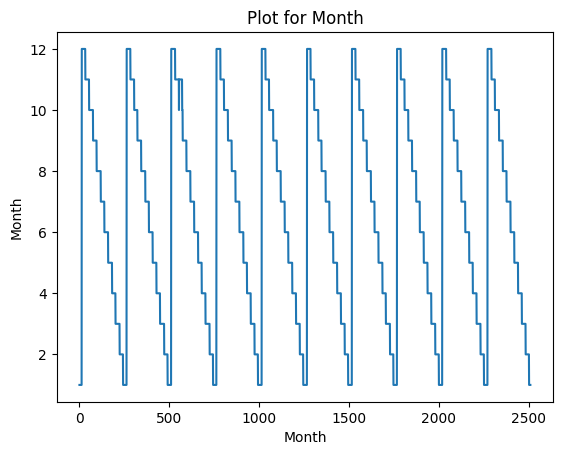

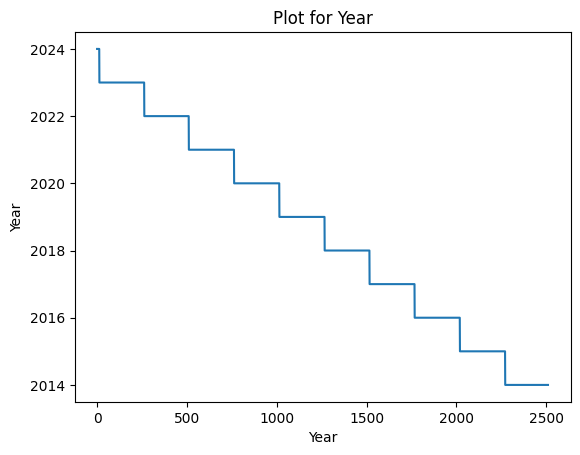

In [ ]:
for column in df.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(df[column])
    plt.title(f"Plot for {column}")
    plt.xlabel(column)
    plt.ylabel(column)
    plt.show()

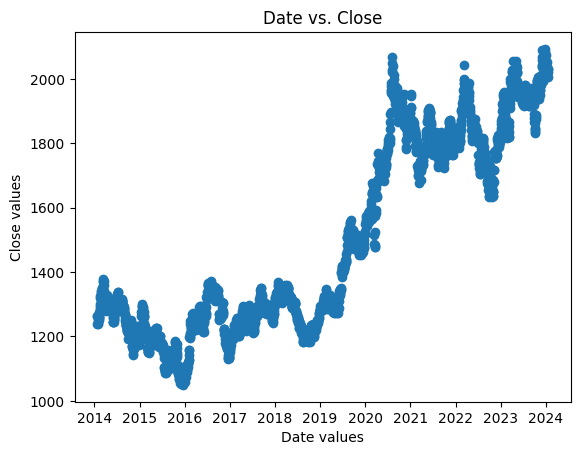

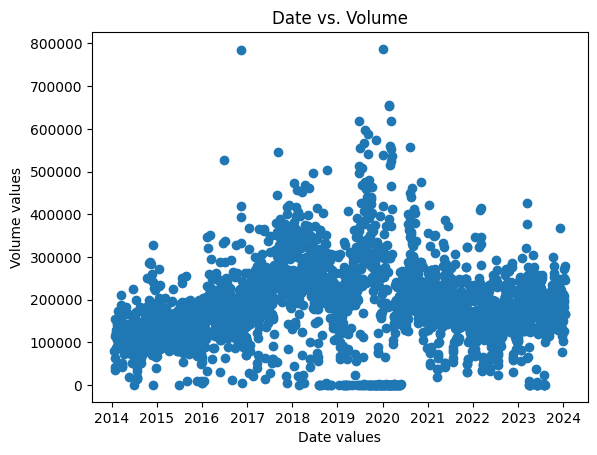

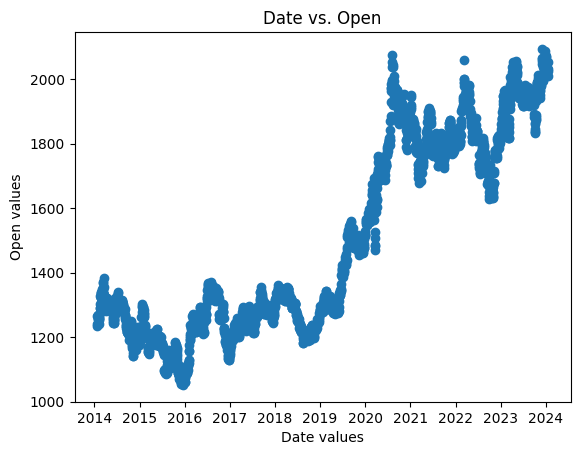

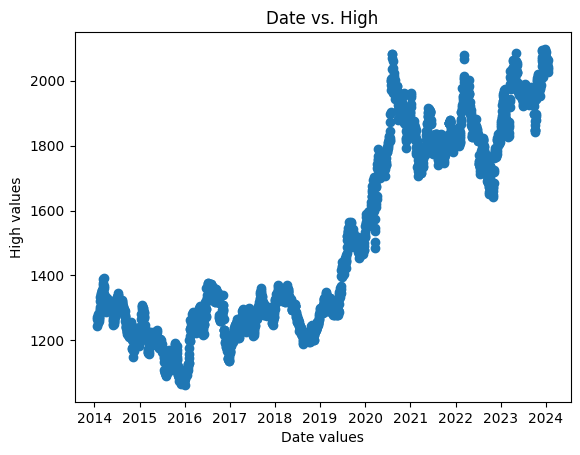

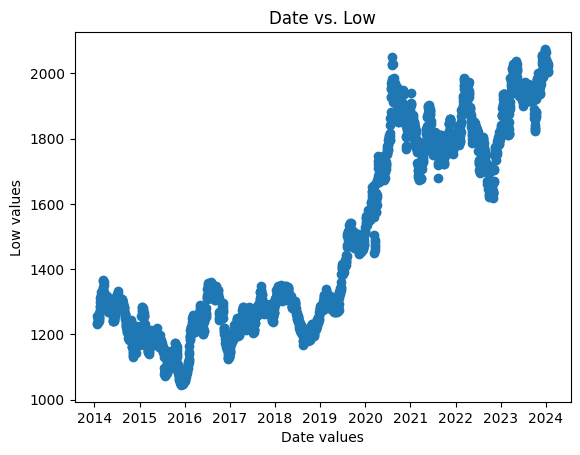

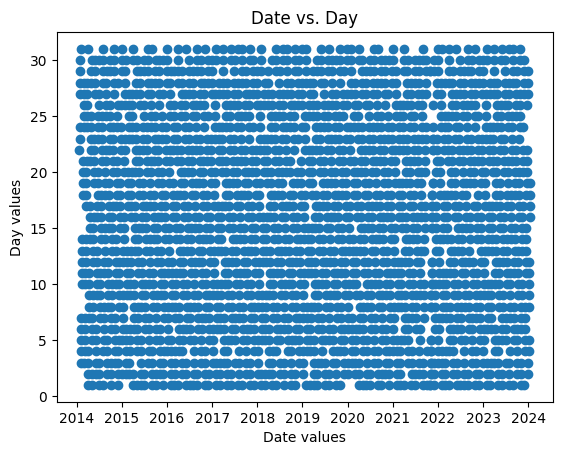

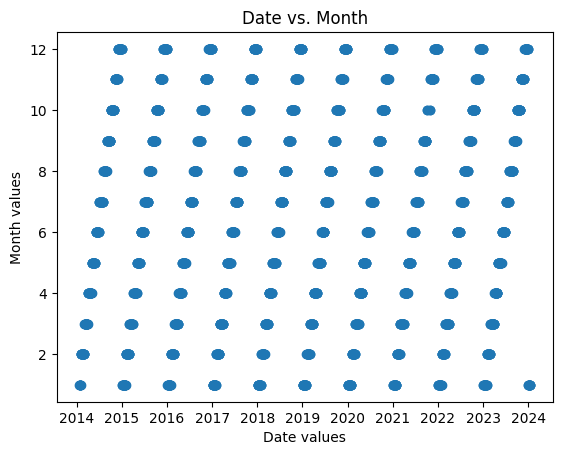

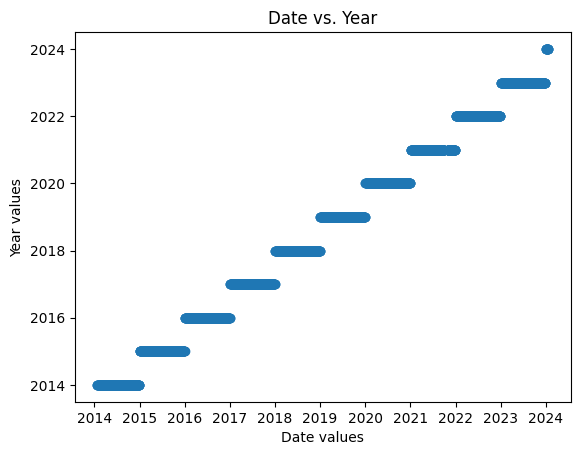

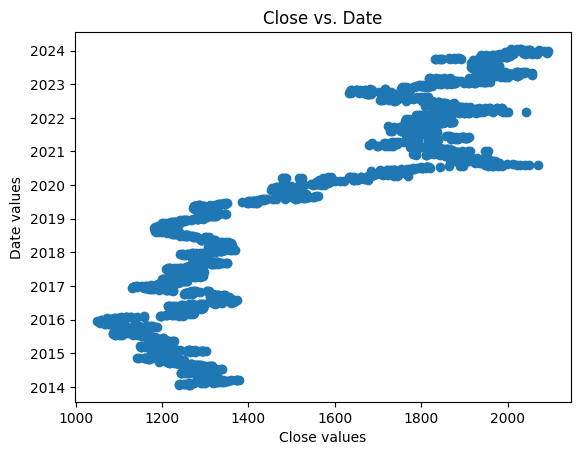

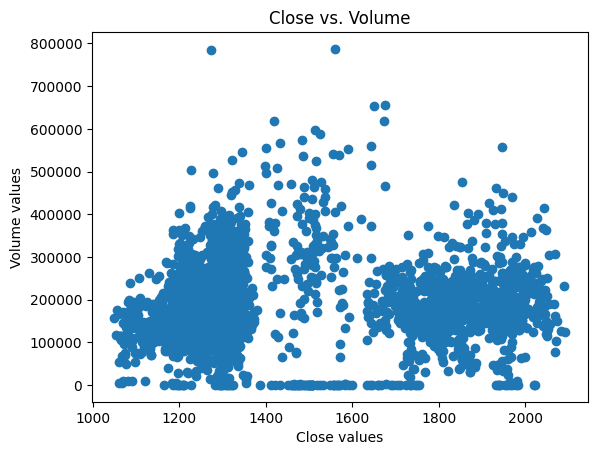

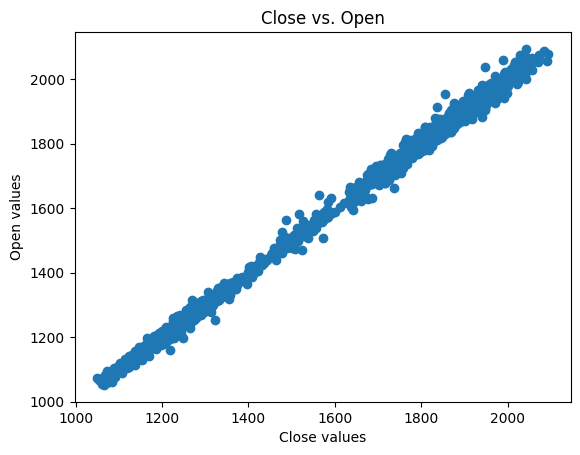

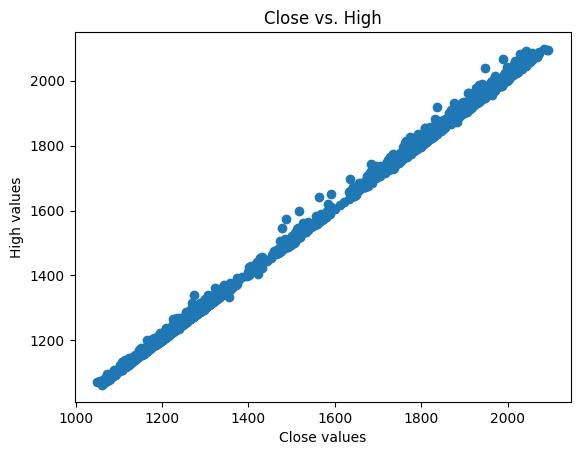

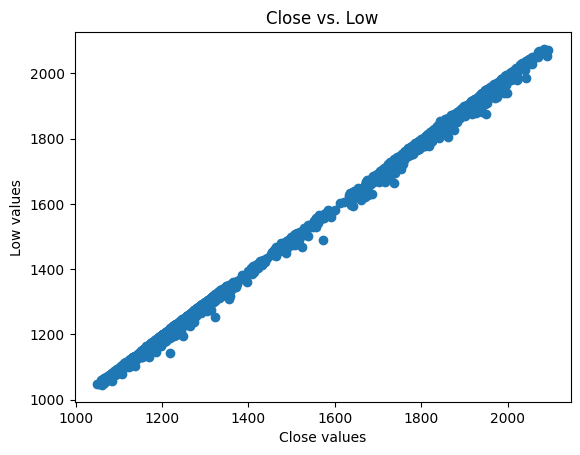

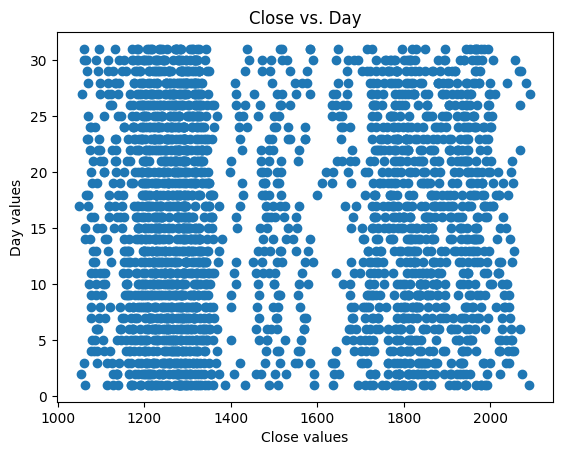

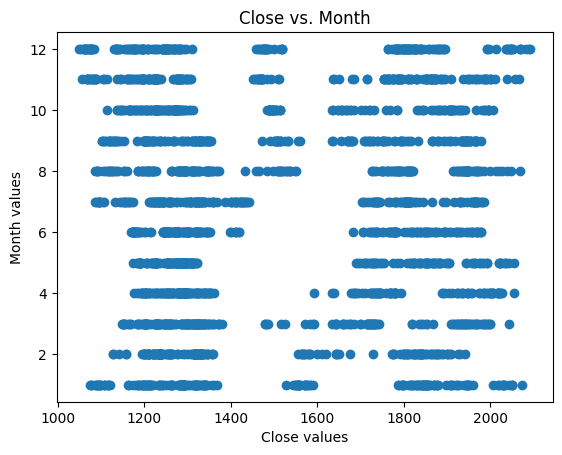

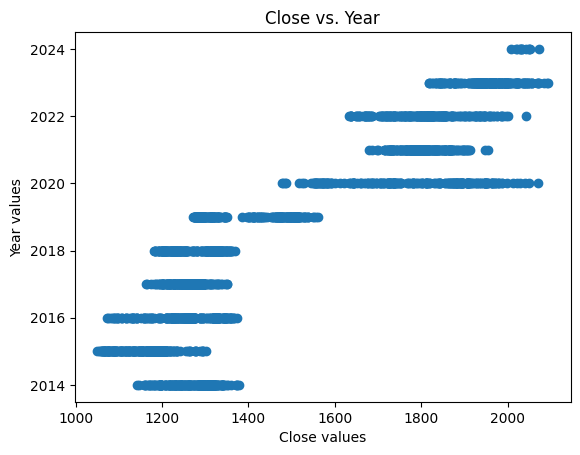

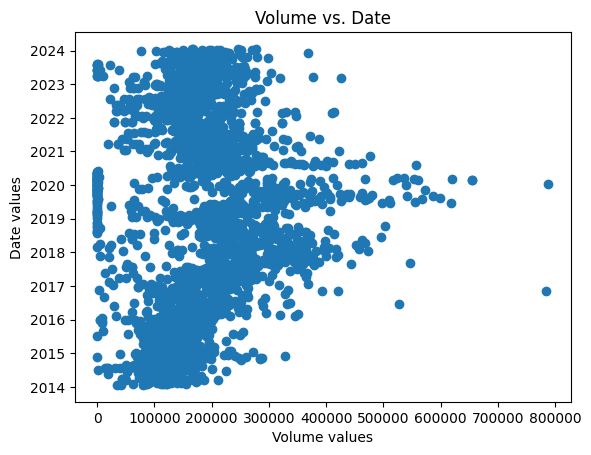

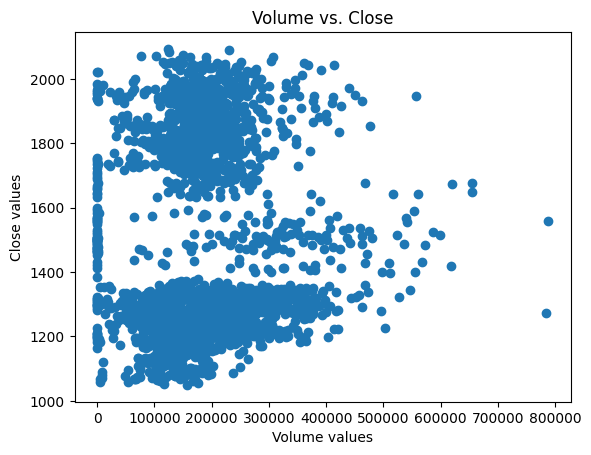

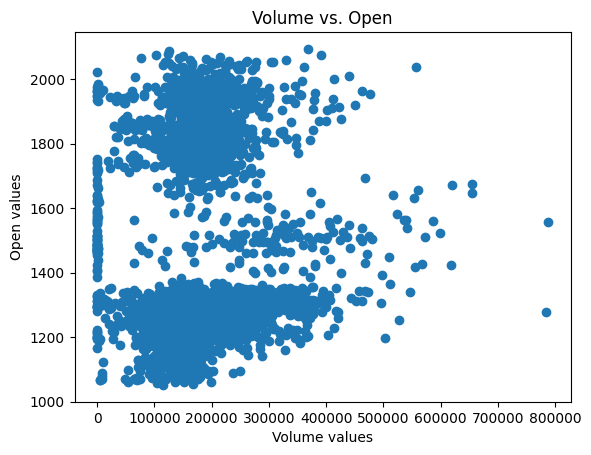

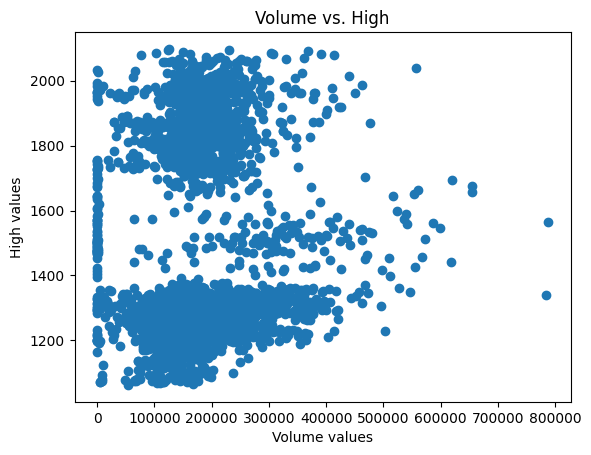

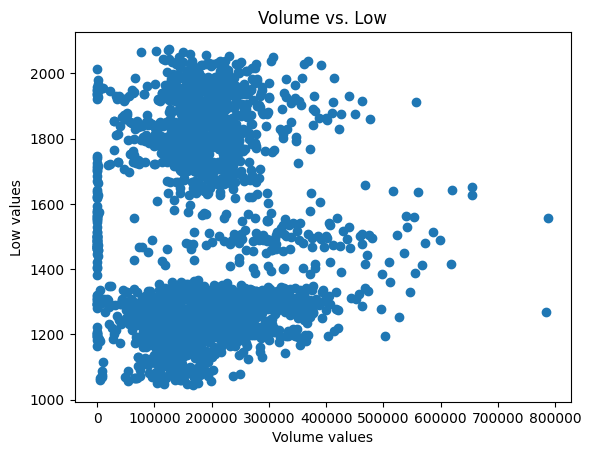

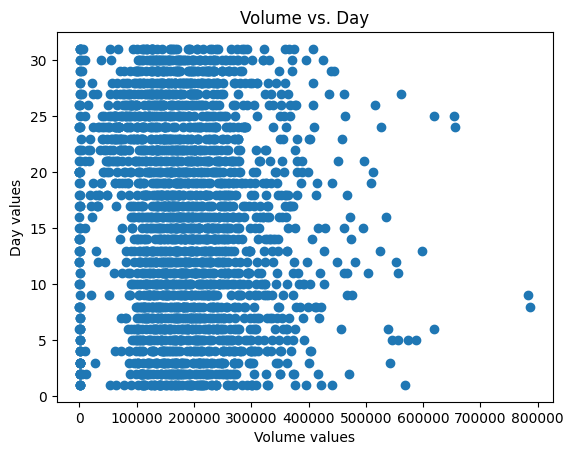

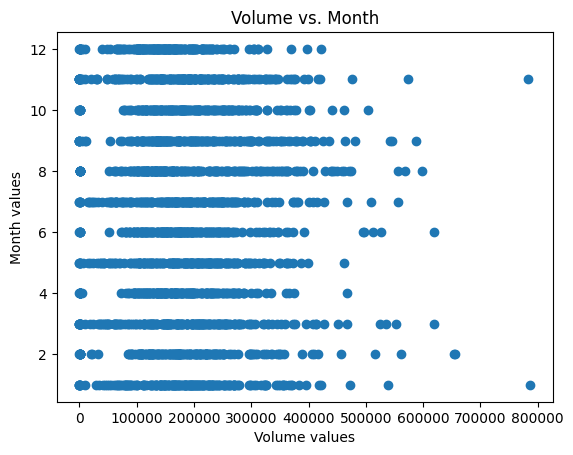

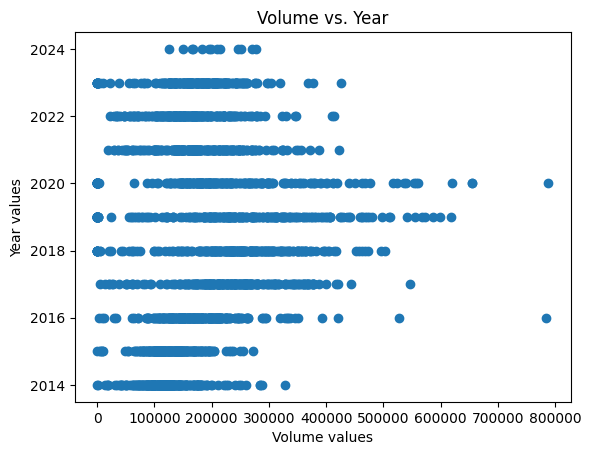

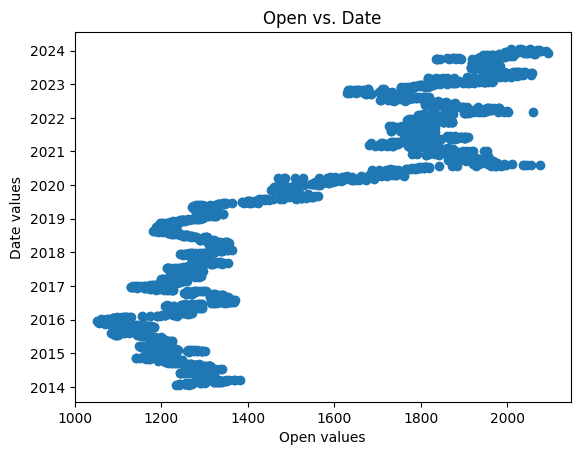

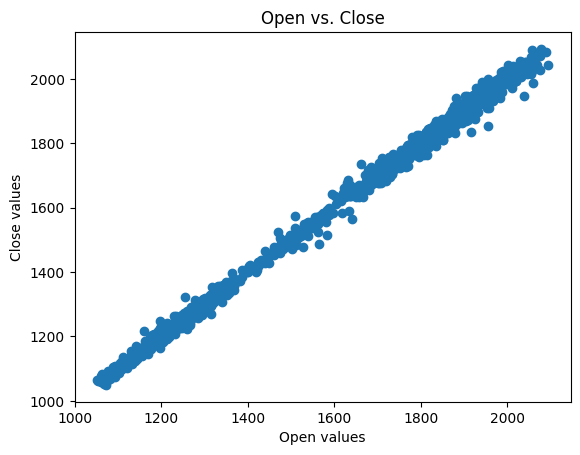

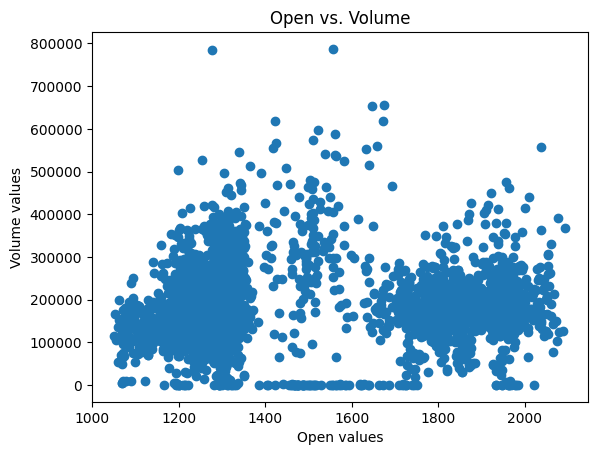

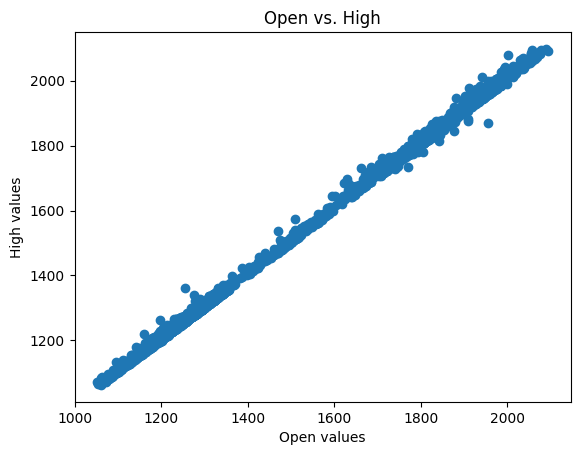

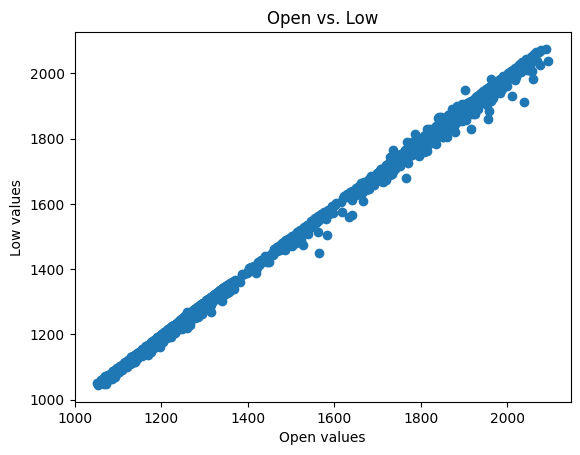

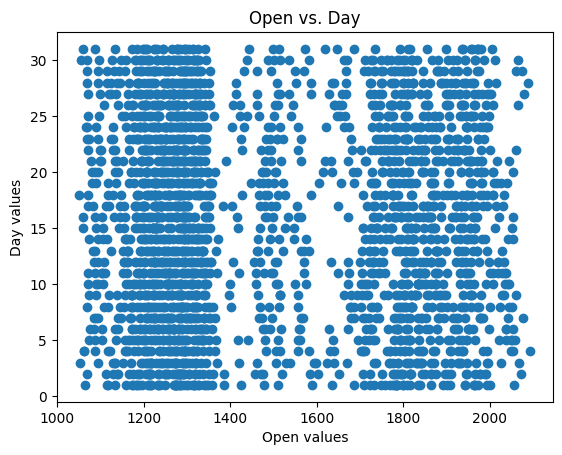

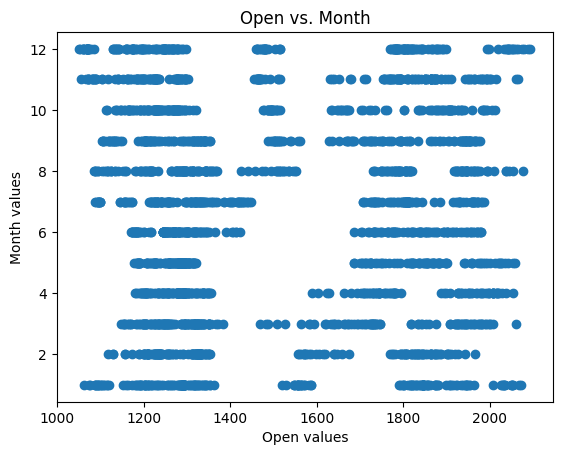

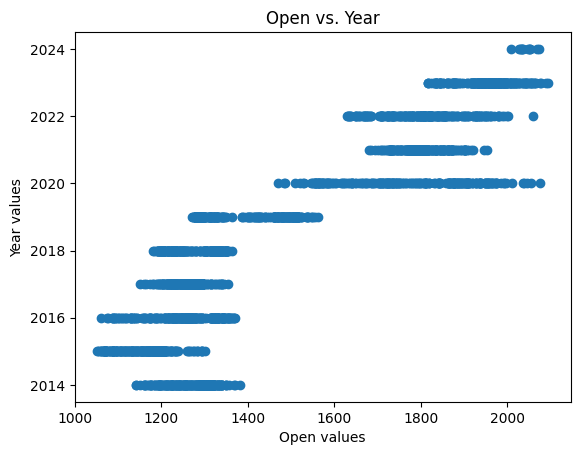

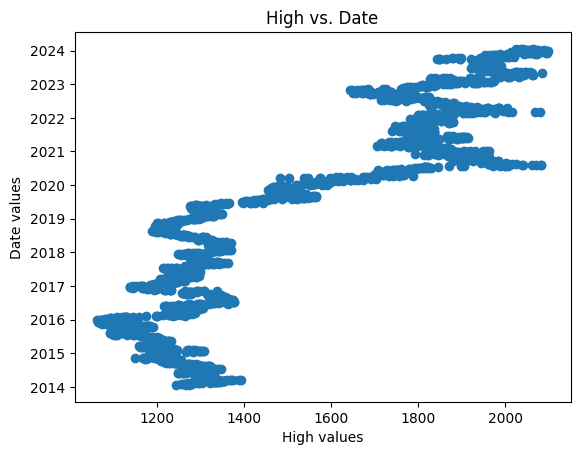

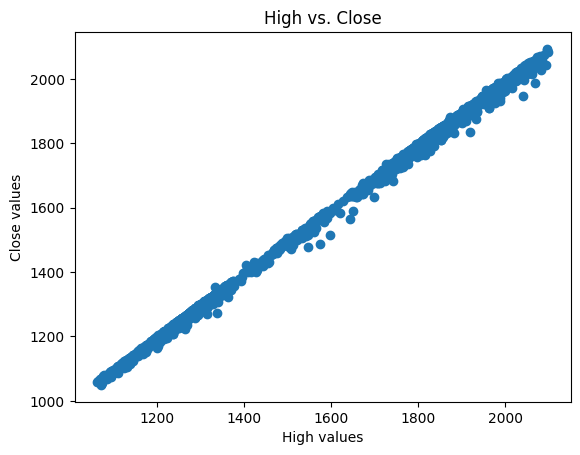

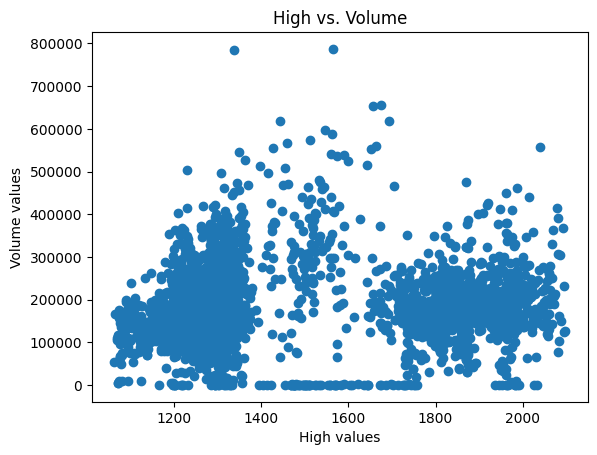

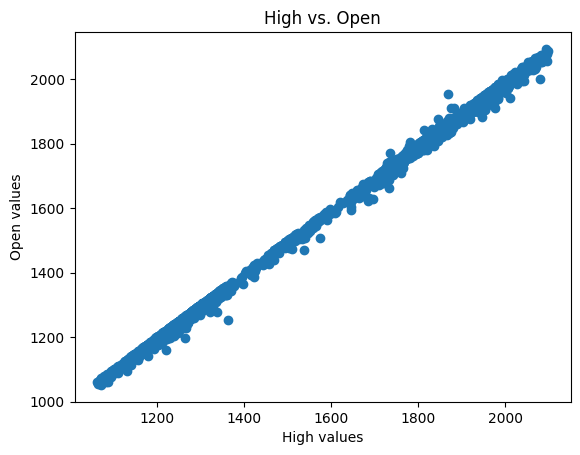

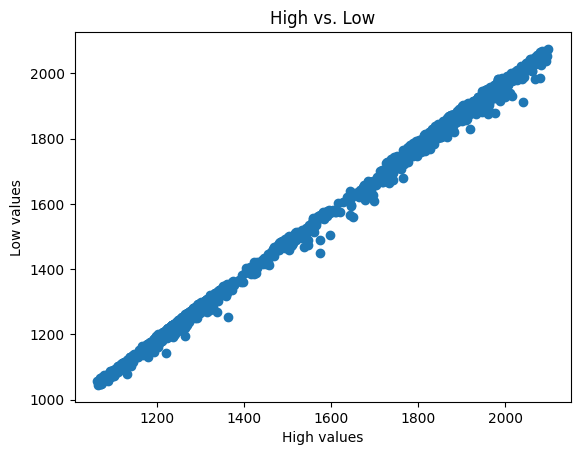

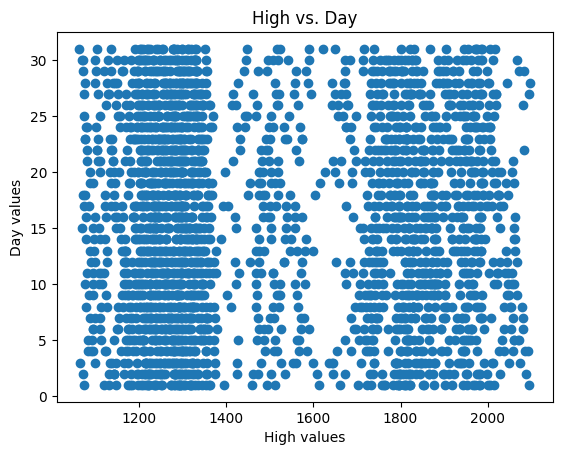

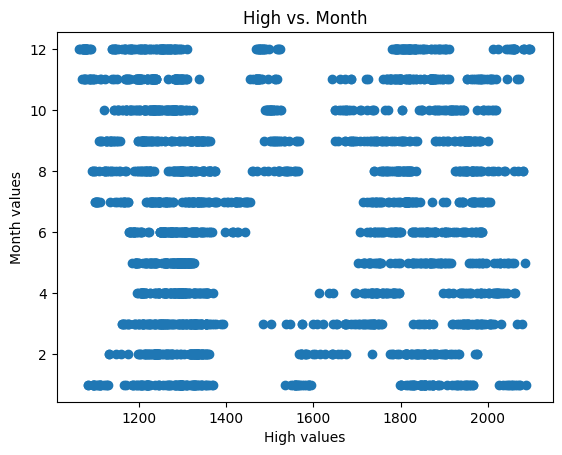

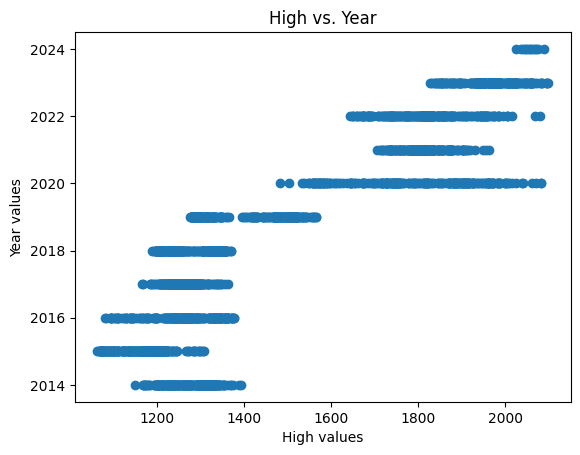

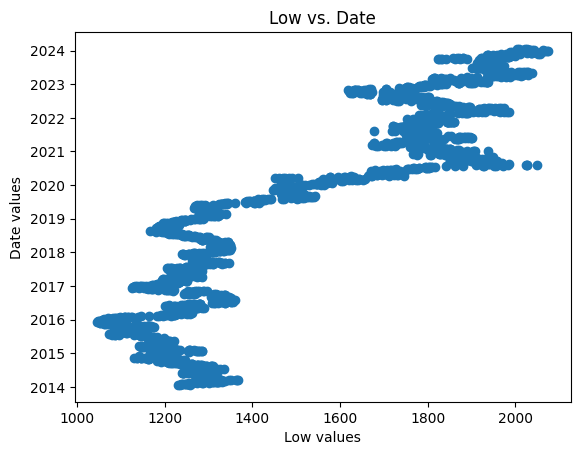

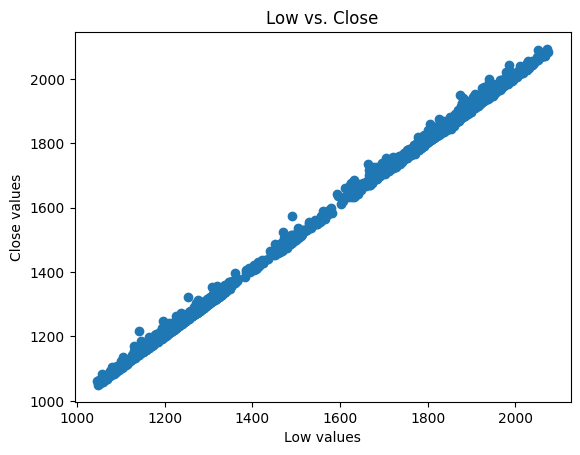

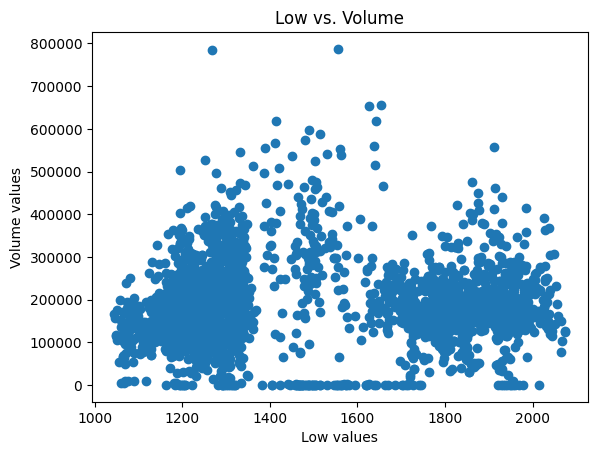

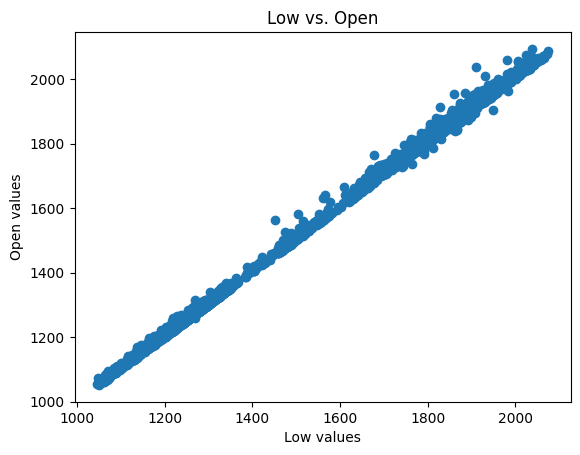

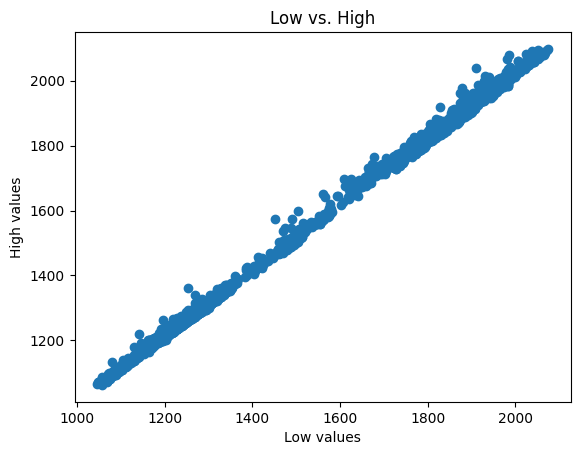

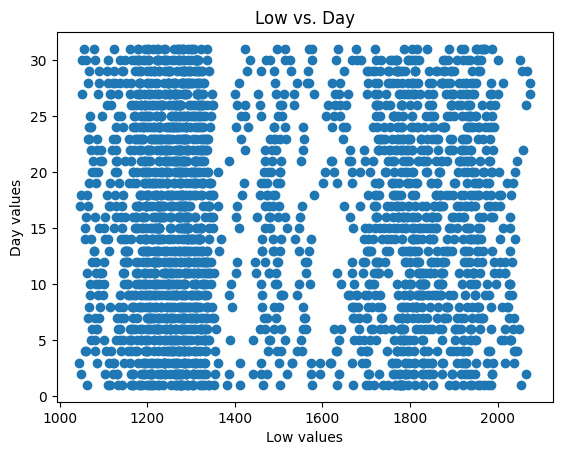

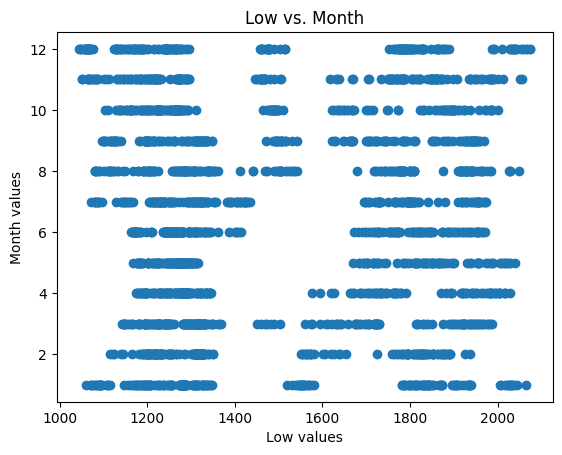

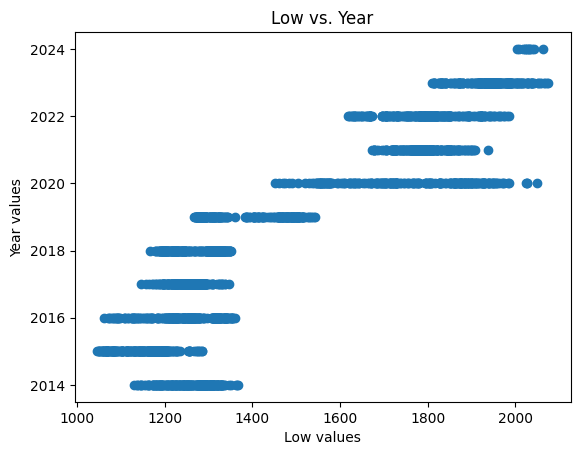

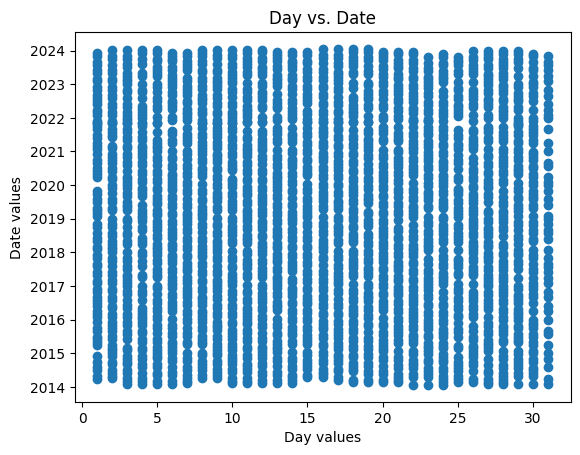

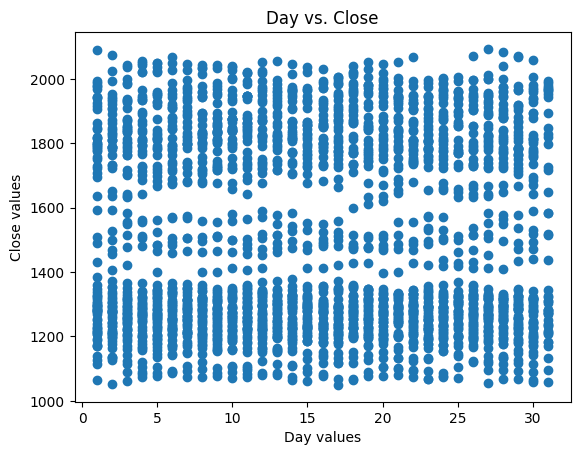

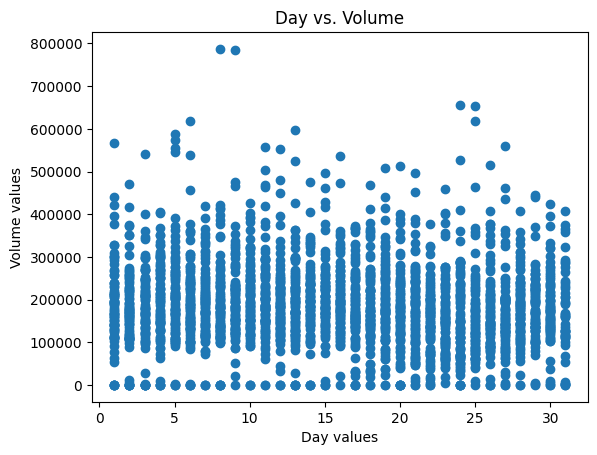

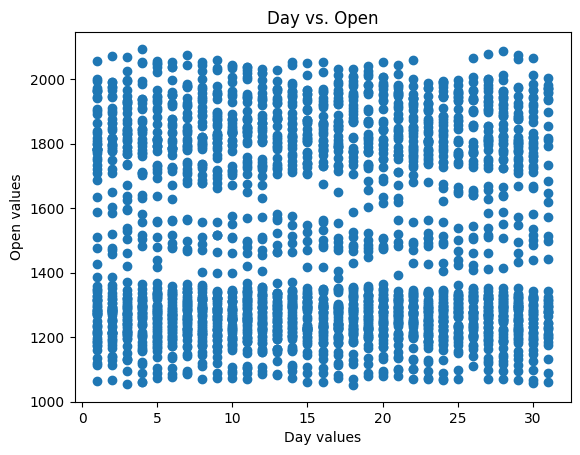

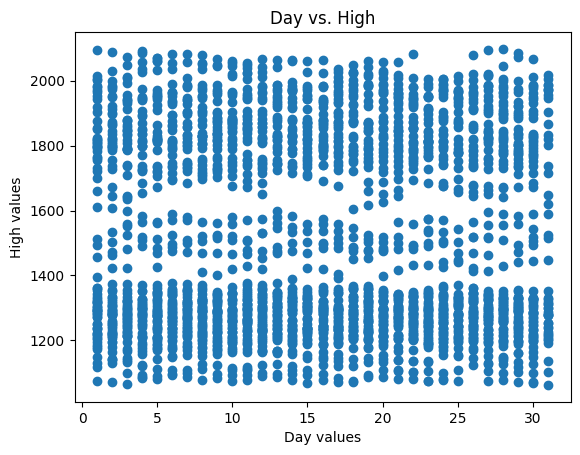

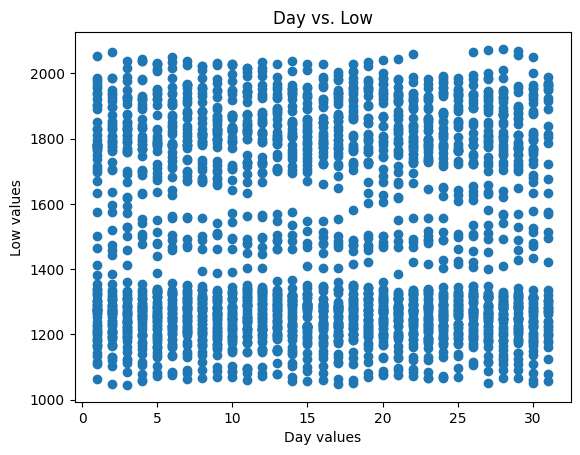

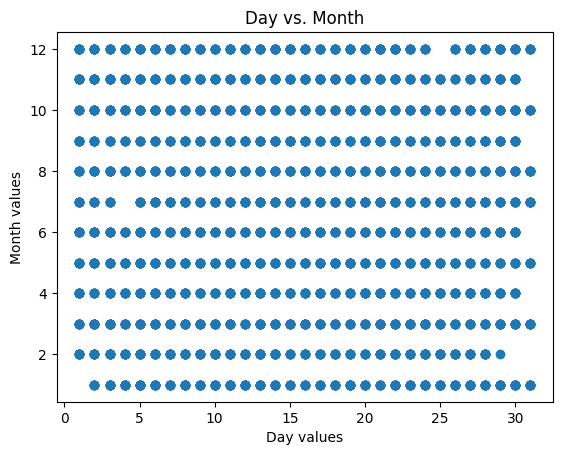

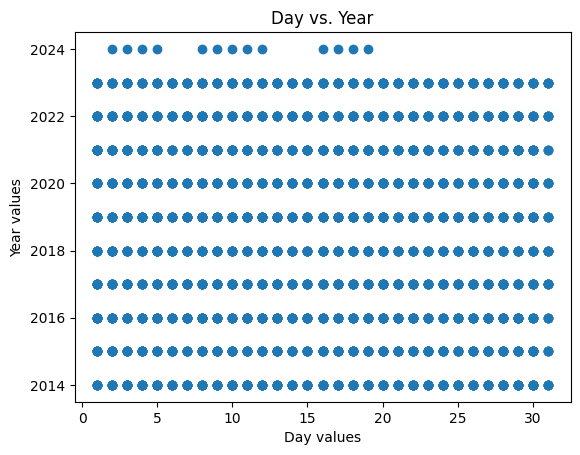

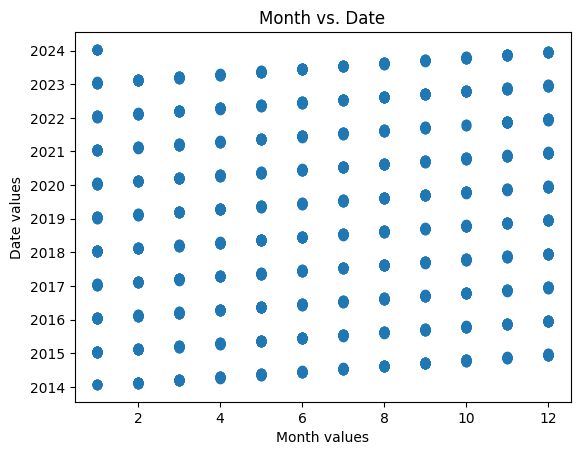

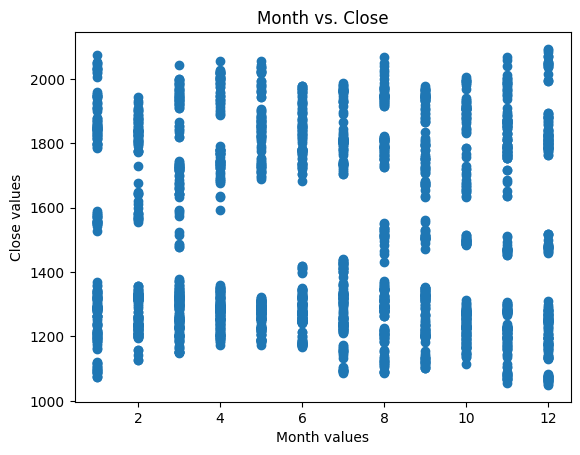

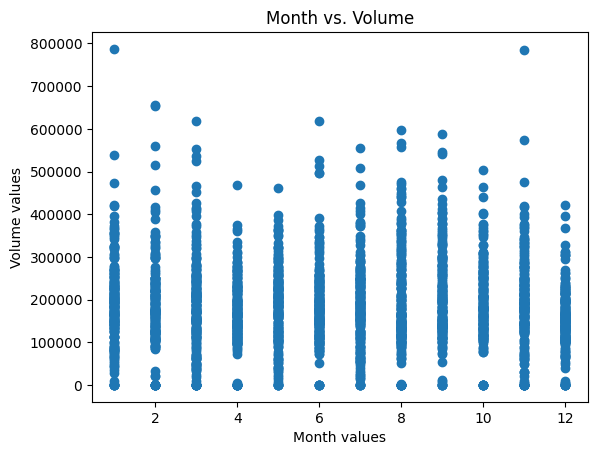

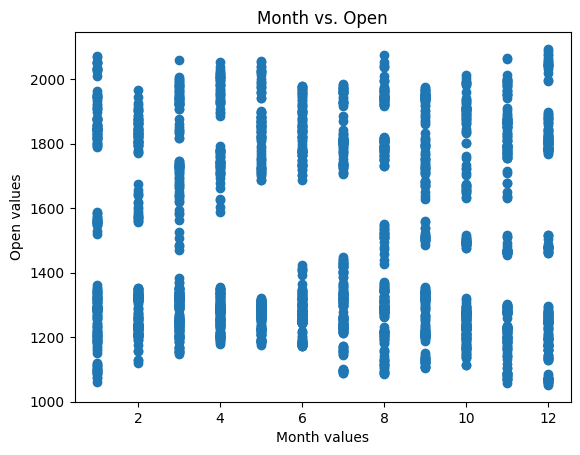

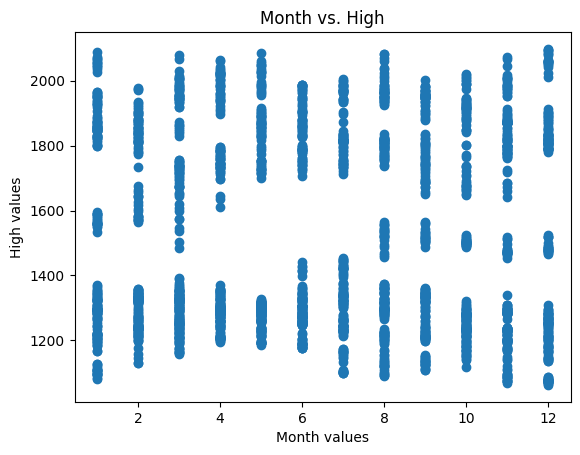

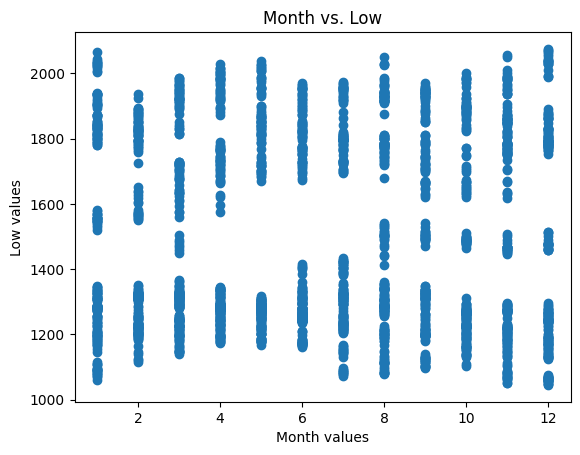

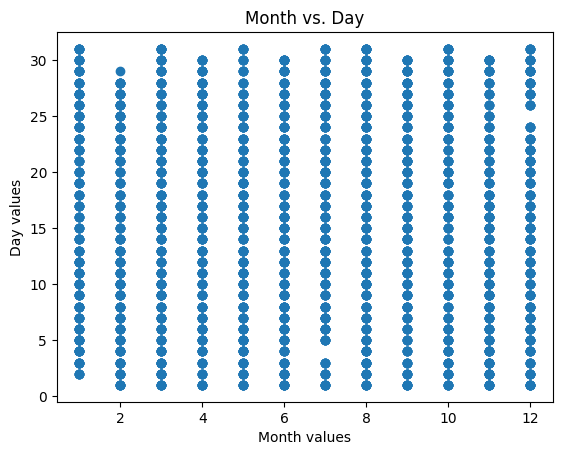

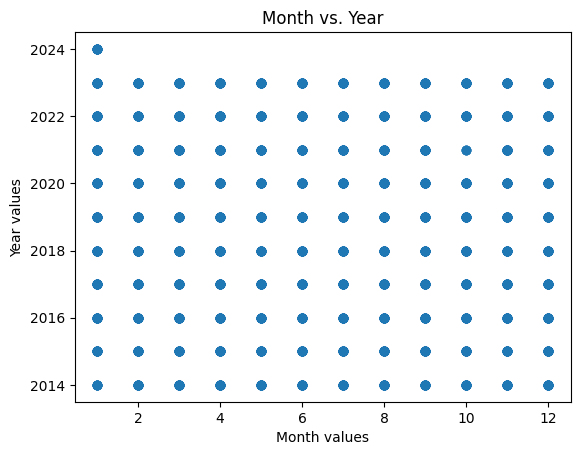

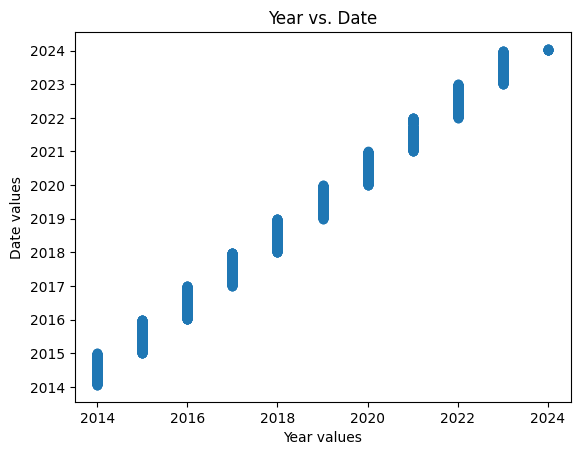

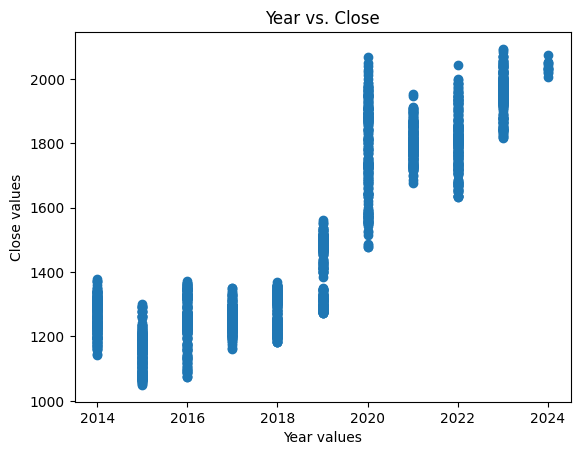

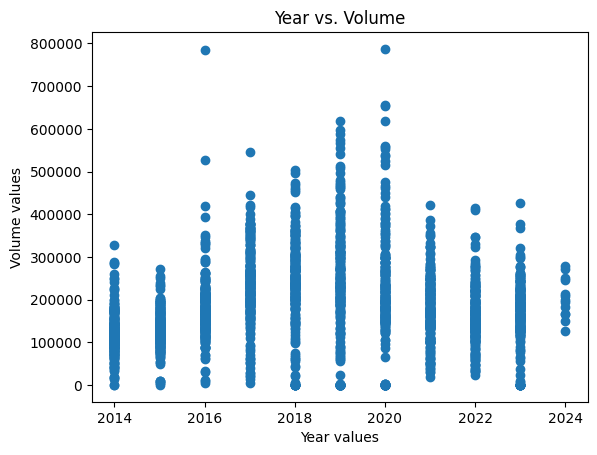

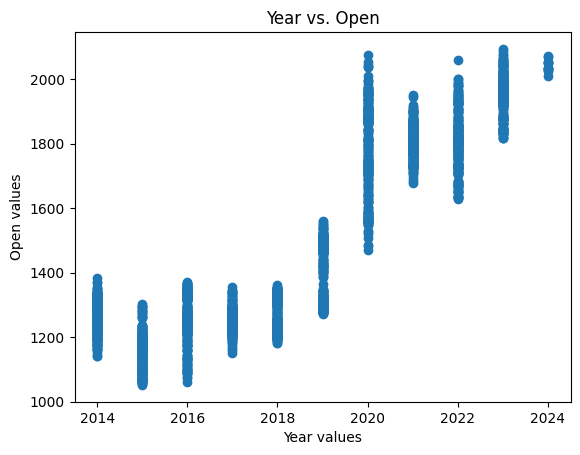

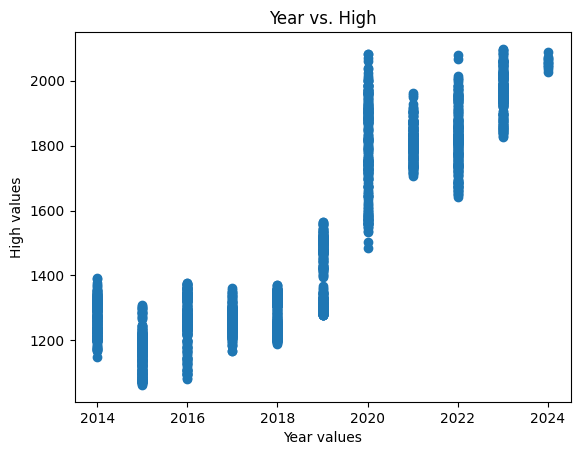

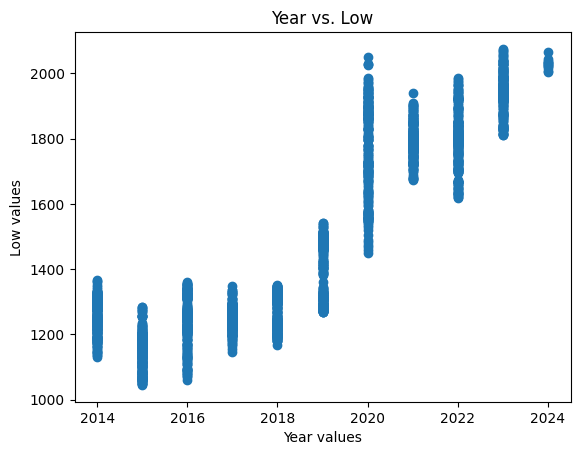

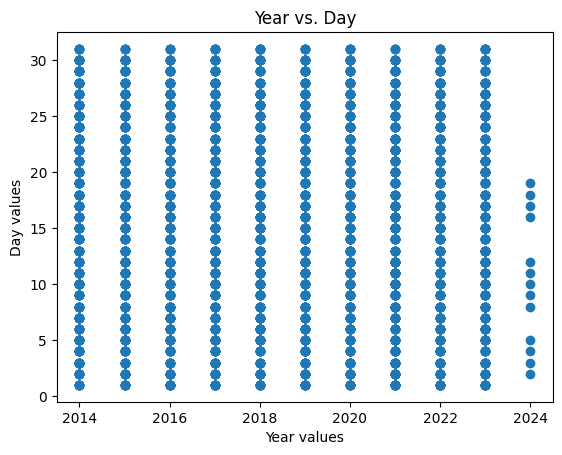

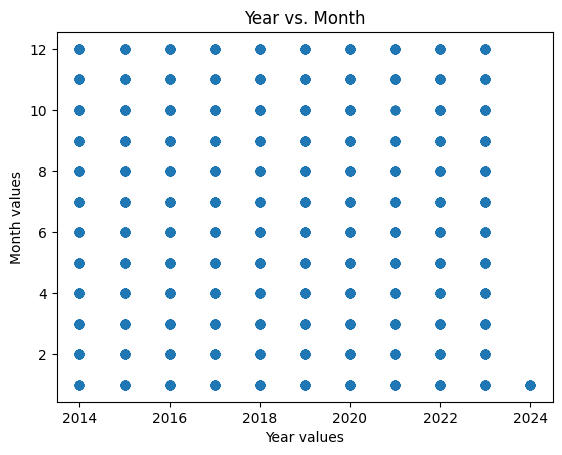

In [ ]:
for col1 in df.columns:
    for col2 in df.columns:
        if col1 != col2:  # Avoid plotting the same column against itself
            plt.figure()
            plt.scatter(df[col1], df[col2])
            plt.title(f"{col1} vs. {col2}")
            plt.xlabel(f"{col1} values")
            plt.ylabel(f"{col2} values")
            plt.show()

In [ ]:
df['MA10'] = df['Close'].rolling(window=10).mean()


In [ ]:
print(df)

           Date   Close    Volume    Open    High     Low  Day  Month  Year  \
0    2024-01-19  2029.3  166078.0  2027.4  2041.9  2022.2   19      1  2024   
1    2024-01-18  2021.6  167013.0  2009.1  2025.6  2007.7   18      1  2024   
2    2024-01-17  2006.5  245194.0  2031.7  2036.1  2004.6   17      1  2024   
3    2024-01-16  2030.2  277995.0  2053.4  2062.8  2027.6   16      1  2024   
4    2024-01-12  2051.6  250946.0  2033.2  2067.3  2033.1   12      1  2024   
...         ...     ...       ...     ...     ...     ...  ...    ...   ...   
2506 2014-01-28  1250.5   81426.0  1254.9  1261.9  1248.0   28      1  2014   
2507 2014-01-27  1263.5   63419.0  1269.9  1280.1  1252.0   27      1  2014   
2508 2014-01-24  1264.5   34998.0  1264.3  1273.2  1256.9   24      1  2014   
2509 2014-01-23  1262.5   41697.0  1235.1  1267.1  1230.8   23      1  2014   
2510 2014-01-22  1238.6   80262.0  1240.5  1243.5  1235.5   22      1  2014   

         MA10  
0         NaN  
1         NaN  
2  

In [ ]:
df = df.fillna(df.mean())


In [ ]:
x = df[['Open', 'High', 'Low', 'Volume', 'MA10']]
y = df['Close']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
predictions = model.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 18.989663982327407


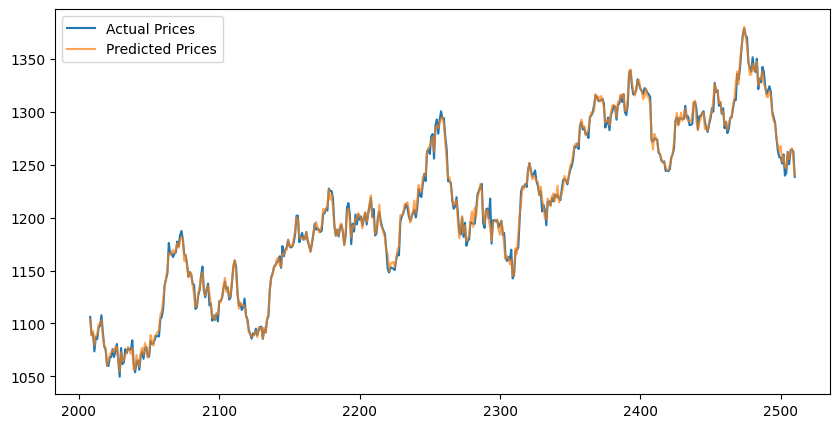

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Predicted Prices', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(x_train, y_train)

DecisionTreeRegressor()

In [ ]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
dt_predictions = decision_tree.predict(x_test)
rf_predictions = random_forest.predict(x_test)

In [ ]:
dt_mse = mean_squared_error(y_test, dt_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

In [ ]:
print(f'Decision Tree Mean Squared Error: {dt_mse}')
print(f'Random Forest Mean Squared Error: {rf_mse}')


Decision Tree Mean Squared Error: 126.44954274353904
Random Forest Mean Squared Error: 114.69940403379537


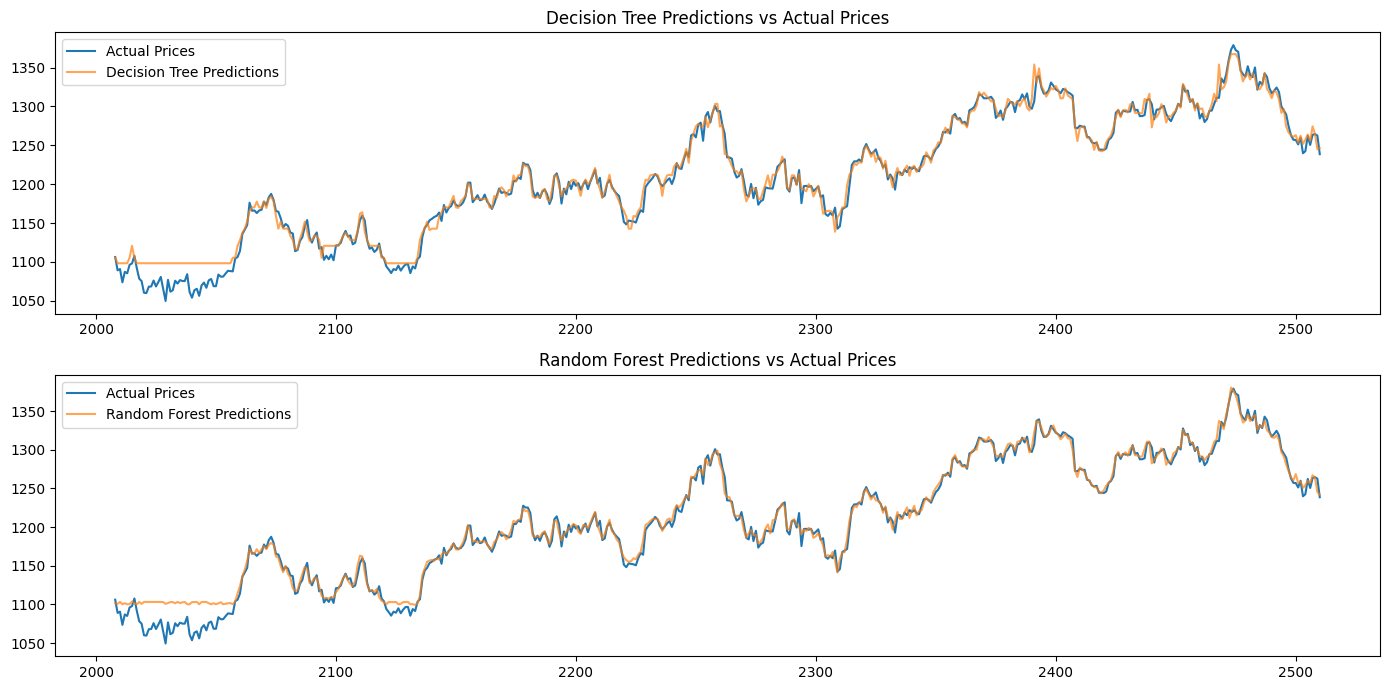

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(2, 1, 1)
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, dt_predictions, label='Decision Tree Predictions', alpha=0.7)
plt.title('Decision Tree Predictions vs Actual Prices')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', alpha=0.7)
plt.title('Random Forest Predictions vs Actual Prices')
plt.legend()

plt.tight_layout()
plt.show()